[[0.0888, 0.5885], [0.1399, 0.8291], [0.0747, 0.4974], [0.0983, 0.5772], [0.1276, 0.5703], [0.1671, 0.5835], [0.1306, 0.5276], [0.1061, 0.5523], [0.2446, 0.4007], [0.167, 0.477], [0.2485, 0.4313], [0.1227, 0.4909], [0.124, 0.5668], [0.1461, 0.5113], [0.2315, 0.3788], [0.0494, 0.559], [0.1107, 0.4799], [0.1121, 0.5735], [0.1007, 0.6318], [0.2567, 0.4326], [0.1956, 0.428]]
KMeans(n_clusters=3, n_init='auto')
y_pred =  [1 2 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0]
[0.0888, 0.1399, 0.0747, 0.0983, 0.1276, 0.1671, 0.1306, 0.1061, 0.2446, 0.167, 0.2485, 0.1227, 0.124, 0.1461, 0.2315, 0.0494, 0.1107, 0.1121, 0.1007, 0.2567, 0.1956]
[0.5885, 0.8291, 0.4974, 0.5772, 0.5703, 0.5835, 0.5276, 0.5523, 0.4007, 0.477, 0.4313, 0.4909, 0.5668, 0.5113, 0.3788, 0.559, 0.4799, 0.5735, 0.6318, 0.4326, 0.428]


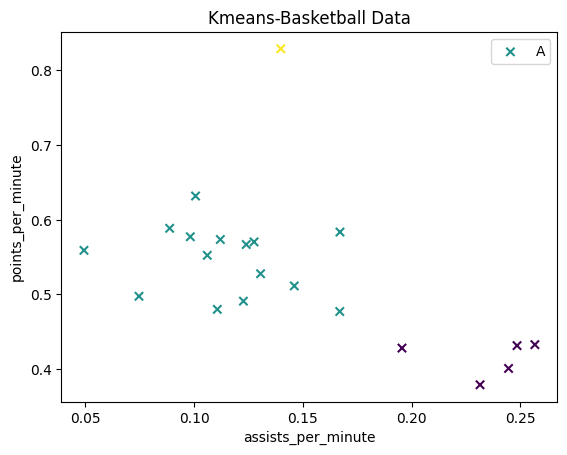

In [10]:
# coding=utf-8  
from sklearn.cluster import KMeans
 
"""
第一部分：数据集
X表示二维矩阵数据，篮球运动员比赛数据
总共20行，每行两列数据
第一列表示球员每分钟助攻数：assists_per_minute
第二列表示球员每分钟得分数：points_per_minute
"""
X = [[0.0888, 0.5885],
     [0.1399, 0.8291],
     [0.0747, 0.4974],
     [0.0983, 0.5772],
     [0.1276, 0.5703],
     [0.1671, 0.5835],
     [0.1306, 0.5276],
     [0.1061, 0.5523],
     [0.2446, 0.4007],
     [0.1670, 0.4770],
     [0.2485, 0.4313],
     [0.1227, 0.4909],
     [0.1240, 0.5668],
     [0.1461, 0.5113],
     [0.2315, 0.3788],
     [0.0494, 0.5590],
     [0.1107, 0.4799],
     [0.1121, 0.5735],
     [0.1007, 0.6318],
     [0.2567, 0.4326],
     [0.1956, 0.4280]   
    ]
 
#输出数据集
print (X)

"""
第二部分：KMeans聚类
clf = KMeans(n_clusters=3) 表示类簇数为3，聚成3类数据，clf即赋值为KMeans
y_pred = clf.fit_predict(X) 载入数据集X，并且将聚类的结果赋值给y_pred
"""

clf = KMeans(n_clusters=3,n_init='auto')
y_pred = clf.fit_predict(X)
 
#输出完整Kmeans函数，包括很多省略参数
print(clf)
#输出聚类预测结果
print("y_pred = ",y_pred)
 
"""
第三部分：可视化绘图
"""

import numpy as np
import matplotlib.pyplot as plt

#获取数据集的第一列和第二列数据 使用for循环获取 n[0]表示X第一列
x = [n[0] for n in X]
print (x)
y = [n[1] for n in X]
print (y)

''' 
绘制散点图 
参数：x横轴; y纵轴; c=y_pred聚类预测结果; marker类型:o表示圆点,*表示星型,x表示点;
'''
plt.scatter(x, y, c=y_pred,marker='x')
 
#绘制标题
plt.title("Kmeans-Basketball Data")
 
#绘制x轴和y轴坐标
plt.xlabel("assists_per_minute")
plt.ylabel("points_per_minute")
 
#设置右上角图例
plt.legend(["A","B","C"])
 
#显示图形
plt.show()


(512, 512)


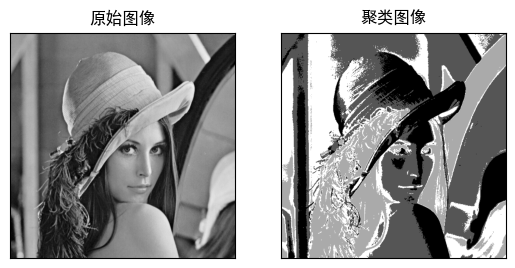

In [11]:
# coding: utf-8

'''
在OpenCV中，Kmeans()函数原型如下所示：
retval, bestLabels, centers = kmeans(data, K, bestLabels, criteria, attempts, flags[, centers])
    data表示聚类数据，最好是np.flloat32类型的N维点集
    K表示聚类类簇数
    bestLabels表示输出的整数数组，用于存储每个样本的聚类标签索引
    criteria表示迭代停止的模式选择，这是一个含有三个元素的元组型数。格式为（type, max_iter, epsilon）
        其中，type有如下模式：
         —–cv2.TERM_CRITERIA_EPS :精确度（误差）满足epsilon停止。
         —-cv2.TERM_CRITERIA_MAX_ITER：迭代次数超过max_iter停止。
         —-cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER，两者合体，任意一个满足结束。
    attempts表示重复试验kmeans算法的次数，算法返回产生的最佳结果的标签
    flags表示初始中心的选择，两种方法是cv2.KMEANS_PP_CENTERS ;和cv2.KMEANS_RANDOM_CENTERS
    centers表示集群中心的输出矩阵，每个集群中心为一行数据
'''

import cv2
import numpy as np
import matplotlib.pyplot as plt

#读取原始图像灰度颜色
img = cv2.imread('lenna.png', 0) 
print (img.shape)

#获取图像高度、宽度
rows, cols = img.shape[:]

#图像二维像素转换为一维
data = img.reshape((rows * cols, 1))
data = np.float32(data)

#停止条件 (type,max_iter,epsilon)
criteria = (cv2.TERM_CRITERIA_EPS +
            cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

#设置标签
flags = cv2.KMEANS_RANDOM_CENTERS

#K-Means聚类 聚集成4类
compactness, labels, centers = cv2.kmeans(data, 4, None, criteria, 10, flags)

#生成最终图像
dst = labels.reshape((img.shape[0], img.shape[1]))

#用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei']

#显示图像
titles = [u'原始图像', u'聚类图像']  
images = [img, dst]  
for i in range(2):  
   plt.subplot(1,2,i+1), plt.imshow(images[i], 'gray'), 
   plt.title(titles[i])  
   plt.xticks([]),plt.yticks([])  
plt.show()


(512, 512, 3)


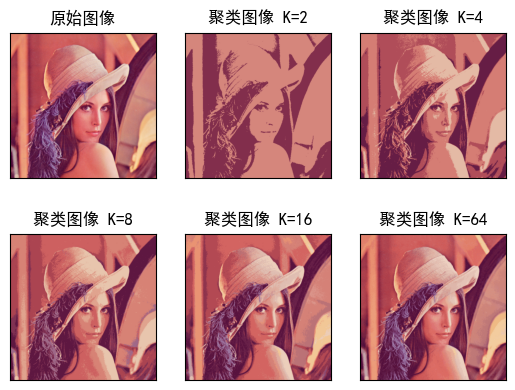

In [12]:
# coding: utf-8
import cv2
import numpy as np
import matplotlib.pyplot as plt

#读取原始图像
img = cv2.imread('lenna.png') 
print (img.shape)

#图像二维像素转换为一维
data = img.reshape((-1,3))
data = np.float32(data)

#停止条件 (type,max_iter,epsilon)
criteria = (cv2.TERM_CRITERIA_EPS +
            cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

#设置标签
flags = cv2.KMEANS_RANDOM_CENTERS

#K-Means聚类 聚集成2类
compactness, labels2, centers2 = cv2.kmeans(data, 2, None, criteria, 10, flags)

#K-Means聚类 聚集成4类
compactness, labels4, centers4 = cv2.kmeans(data, 4, None, criteria, 10, flags)

#K-Means聚类 聚集成8类
compactness, labels8, centers8 = cv2.kmeans(data, 8, None, criteria, 10, flags)

#K-Means聚类 聚集成16类
compactness, labels16, centers16 = cv2.kmeans(data, 16, None, criteria, 10, flags)

#K-Means聚类 聚集成64类
compactness, labels64, centers64 = cv2.kmeans(data, 64, None, criteria, 10, flags)

#图像转换回uint8二维类型
centers2 = np.uint8(centers2)
res = centers2[labels2.flatten()]
dst2 = res.reshape((img.shape))

centers4 = np.uint8(centers4)
res = centers4[labels4.flatten()]
dst4 = res.reshape((img.shape))

centers8 = np.uint8(centers8)
res = centers8[labels8.flatten()]
dst8 = res.reshape((img.shape))

centers16 = np.uint8(centers16)
res = centers16[labels16.flatten()]
dst16 = res.reshape((img.shape))

centers64 = np.uint8(centers64)
res = centers64[labels64.flatten()]
dst64 = res.reshape((img.shape))

#图像转换为RGB显示
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
dst2 = cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB)
dst4 = cv2.cvtColor(dst4, cv2.COLOR_BGR2RGB)
dst8 = cv2.cvtColor(dst8, cv2.COLOR_BGR2RGB)
dst16 = cv2.cvtColor(dst16, cv2.COLOR_BGR2RGB)
dst64 = cv2.cvtColor(dst64, cv2.COLOR_BGR2RGB)

#用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei']

#显示图像
titles = [u'原始图像', u'聚类图像 K=2', u'聚类图像 K=4',
          u'聚类图像 K=8', u'聚类图像 K=16',  u'聚类图像 K=64']  
images = [img, dst2, dst4, dst8, dst16, dst64]  
for i in range(6):  
   plt.subplot(2,3,i+1), plt.imshow(images[i], 'gray'), 
   plt.title(titles[i])  
   plt.xticks([]),plt.yticks([])  
plt.show()
